In [1]:
import pandas as pd
import requests

# Data Section

In [2]:
def get_explore_url(lat, lng, radius):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    return url

In [3]:
CLIENT_ID = 'CCZZRQFMN0ASTRIFCSGDCSDH4NLUA2C1PDV1DNZLX0KK4AXY'
CLIENT_SECRET = 'UTWNBZO55ZL4NFTQZ5UAKHPEZQ0M1PRZHXCHKHLYNPR2UZHT'
VERSION = '20180605'
LIMIT = 100

In [4]:
# ORIGIN code for capital data download:

# capitals['explore_url'] = capitals.apply(lambda row: get_explore_url(row['Capital Latitude'],
#                                                                  row['Capital Longitude'], 5000), axis=1)
# capitals['json'] = capitals['explore_url'].apply(lambda x: requests.get(x).json())
# capitals["response"] = capitals['json'].apply(lambda x: x['response'])


# due to limited number of queries and downloadtime I use a file contains once downloaded data.

capitals = pd.read_pickle('shot_two.pkl')
capitals.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name,explore_url,json,response
1,Afghanistan,Kabul,34.51666667,69.183333,AF,Asia,https://api.foursquare.com/v2/venues/explore?&...,"{'meta': {'code': 200, 'requestId': '5f1405736...",{'suggestedFilters': {'header': 'Tap to show:'...
2,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe,https://api.foursquare.com/v2/venues/explore?&...,"{'meta': {'code': 200, 'requestId': '5f1408ed6...",{'suggestedFilters': {'header': 'Tap to show:'...
3,Albania,Tirana,41.31666667,19.816667,AL,Europe,https://api.foursquare.com/v2/venues/explore?&...,"{'meta': {'code': 200, 'requestId': '5f14062f6...",{'suggestedFilters': {'header': 'Tap to show:'...
4,Algeria,Algiers,36.75,3.05,DZ,Africa,https://api.foursquare.com/v2/venues/explore?&...,"{'meta': {'code': 200, 'requestId': '5f1407e04...",{'suggestedFilters': {'header': 'Tap to show:'...
5,American Samoa,Pago Pago,-14.26666667,-170.7,AS,Australia,https://api.foursquare.com/v2/venues/explore?&...,"{'meta': {'code': 200, 'requestId': '5f14080e5...","{'headerLocation': 'Pago Pago', 'headerFullLoc..."


In [5]:
# in order to prevent doubles in capital names:
countries_to_be_dismised = ['Norfolk Island', 'US Minor Outlying Islands', 'Palestine']
capitals = capitals[~capitals['Country Name'].isin(countries_to_be_dismised)]

In [6]:
life_expectancy = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')[0]
life_expectancy = life_expectancy[[('Countries and regions', 'Countries and regions'),
                                   ('Life expectancy at birth (in years)', 'Overall')]]
life_expectancy = life_expectancy.T.reset_index(drop=True).T.rename(columns={0: 'Countries and regions',
                                                                             1: 'Life expectancy'})
life_expectancy.head()

,Countries and regions,Life expectancy
0,Hong Kong,84.7
1,Japan,84.5
2,Singapore,83.8
3,Italy,83.6
4,Spain,83.4


In [7]:
gdp_per_capita = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita')[3]
gdp_per_capita.head()

,Rank,Country/Territory,Int$
0,—,Macau,129103
1,1,Luxembourg,121293
2,2,Singapore,101376
3,3,Qatar,96491
4,4,Ireland,88241


In [8]:
capitals_population = pd.read_html('https://en.wikipedia.org/wiki/List_of_national_capitals_by_population')[1]
capitals_population.rename(columns={'Capital': 'Capital Name'}, inplace=True)
capitals_population.to_csv('capitals_population.csv')
capitals_population.head()

,Rank,Country/Territory,Capital Name,Population,Year,% ofcountry'spopulation
0,1,China,Beijing,"21,542,000[1]",2010,1.5%
1,2,India,New Delhi,14200004,2011,1.05%
2,3,Japan,Tokyo,"13,929,286[2]",2017,11.03%
3,4,Democratic Republic of the Congo,Kinshasa,"12,691,000[3]",2017,14.9%
4,5,Russia,Moscow,"12,506,468[4]",2011,8.52%


In [9]:
capitals_population['Population'] = capitals_population['Population'].apply(lambda x: 
                                                                            x.split('[')[0].replace(',',''))
capitals_population['Population'] = capitals_population['Population'].apply(lambda x: 
                                                                            x.split(' (')[0])
capitals_population = capitals_population[capitals_population['Population'] != 'n/a']
capitals_population['Population'] = capitals_population['Population'].apply(float)

# Country name unification

In [10]:
life_expectancy['Countries and regions'].replace({"People's Republic of China": 'China',
                                                  'Brunei': 'Brunei Darussalam', 'Eswatini': 'Swaziland',
                                                  'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
                                                  "Côte d'Ivoire": 'Cote d’Ivoire', 'Gambia': 'The Gambia',
                                                  'Congo, Republic of': 'Republic of Congo', 
                                                  'Timor Leste':'Timor-Leste', 'Cabo Verde': 'Cape Verde',
                                                  'North Macedonia': 'Macedonia'
                                                  }, inplace=True)

life_expectancy.rename(columns={'Countries and regions': 'Country Name'}, inplace=True)

In [11]:
gdp_per_capita['Country/Territory'] = gdp_per_capita['Country/Territory'].apply(lambda x: x.split(' (')[0])
gdp_per_capita['Country/Territory'].replace({'Brunei': 'Brunei Darussalam', 
                                             'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
                                             "Côte d'Ivoire": 'Cote d’Ivoire', 'Gambia, The': 'The Gambia',
                                             'Congo, Republic of the': 'Republic of Congo', 
                                             'Bahamas, The': 'Bahamas', 'Curaçao': 'CuraÃ§ao',
                                             'Korea, South': 'South Korea', 'Eswatini': 'Swaziland',
                                             'São Tomé and Príncipe': 'Sao Tome and Principe',
                                             'Micronesia, Federated States of': 'Federated States of Micronesia',
                                             'North Macedonia': 'Macedonia'}, inplace=True)
gdp_per_capita.rename(columns={'Country/Territory': 'Country Name'}, inplace=True)

In [12]:
capitals_population['Country/Territory'] = capitals_population['Country/Territory'].apply(lambda x: 
                                                                                          x.split(' (')[0])
capitals_population['Country/Territory'].replace({'Brunei': 'Brunei Darussalam', 
                     'DR Congo': 'Democratic Republic of the Congo',
                     'Ivory Coast': 'Cote d’Ivoire', 'Åland': 'Aland Islands',
                     'Congo': 'Republic of Congo', 'Cocos': 'Cocos Islands',
                     'Curaçao': 'CuraÃ§ao', 'East Timor': 'Timor-Leste',
                     'Eswatini': 'Swaziland', 'Saint Barthélemy': 'Saint Barthelemy',
                     'United States Virgin Islands': 'US Virgin Islands',
                     'Collectivity of Saint Martin': 'Saint Martin',
                     'South Georgia and the South Sandwich Islands': 'South Georgia and South Sandwich Islands',
                     'São Tomé and Príncipe': 'Sao Tome and Principe', 
                     'Sahrawi Arab Democratic Republic': 'Western Sahara',
                     'North Macedonia': 'Macedonia'}, inplace=True) 
capitals_population.rename(columns={'Country/Territory': 'Country Name'}, inplace=True)

In [13]:
capitals_population.rename(columns={'Capital Name': 'Capital Name pop'}, inplace=True)

In [14]:
capitals.set_index('Country Name', inplace=True)
life_expectancy.set_index('Country Name', inplace=True)
gdp_per_capita.set_index('Country Name', inplace=True)
capitals_population.set_index('Country Name', inplace=True)

In [15]:
to_analyse = pd.concat([capitals, capitals_population, life_expectancy, gdp_per_capita], axis=1, sort=False)
to_analyse.drop(columns=['Year', 'explore_url', 'json', 'Rank', 
                         'Country Code', "% ofcountry'spopulation"], inplace=True)

# Capital names comparison {capitals vs capitals_population}

In [16]:
to_analyse['Capital Name pop'].replace({"St. John's": "Saint John’s", 'Bogotá': 'Bogota', 'San José': 'San Jose',
                                        'Brasília': 'Brasilia', 'Yaoundé': 'Yaounde', "N'Djamena": "N’Djamena",
                                        'Djibouti (city)': 'Djibouti', 'Tórshavn': 'Torshavn', 
                                        'Hagåtña': 'Hagatna', 'St. Peter Port': 'Saint Peter Port',
                                        'Reykjavík': 'Reykjavik', 'Jerusalem[43]': 'Jerusalem',
                                        'Nur-Sultan': 'Astana', 'Prishtina': 'Pristina', 'Malé': 'Male',
                                        'Nuuk (Godthåb)': 'Nuuk', "St. George's": 'Saint George’s', 
                                        'Chişinău': 'Chisinau', 'Yaren (de facto)': 'Yaren', 'Nouméa': 'Noumea',
                                        'Quito (de jure) Guayaquil (de facto) seat-of-government': 'Quito',
                                        'Kingston (de facto)': 'Kingston', 'Asunción': 'Asuncion', 
                                        'City of San Marino': 'San Marino', 'Berne (de facto)': 'Bern', 
                                        'Lomé': 'Lome', "Nukuʻalofa": "Nuku’alofa", 'Kiev': 'Kyiv',
                                        'Port Vila': 'Port-Vila', 'Vatican City (city-state)': 'Vatican City',
                                        'El Aaiún (claimed)Tifariti (factual)': 'El-AaiÃºn', "Sana'a": 'Sanaa',
                                        'São Tomé': 'Sao Tome'
                                       }, inplace=True) 

In [17]:
# Number of cities are abandoned due to capital ambiguity
to_analyse[(to_analyse['Capital Name'] != to_analyse['Capital Name pop']) & 
           ~to_analyse['Capital Name'].isna()] [['Capital Name', 'Capital Name pop']]

,Capital Name,Capital Name pop
Bolivia,La Paz,Sucre
British Indian Ocean Territory,Diego Garcia,NaN
Burundi,Bujumbura,Gitega
Christmas Island,The Settlement,Flying Fish Cove
French Southern and Antarctic Lands,Port-aux-FranÃ§ais,NaN
Montserrat,Plymouth,Brades (de facto)
Myanmar,Rangoon,Naypyidaw[45]
Northern Cyprus,North Nicosia,NaN
Palau,Melekeok,Ngerulmud
Republic of Congo,Brazzaville,NaN


In [18]:
to_analyse = to_analyse[to_analyse['Capital Name'] == to_analyse['Capital Name pop']]
to_analyse.drop(columns=['Capital Name pop'], inplace=True)
to_analyse.dropna(inplace=True)

In [19]:
to_analyse.head()

,Capital Name,Capital Latitude,Capital Longitude,Continent Name,response,Population,Life expectancy,Int$
Afghanistan,Kabul,34.51666667,69.183333,Asia,{'suggestedFilters': {'header': 'Tap to show:'...,3140853.0,64.5,2293.0
Algeria,Algiers,36.75,3.05,Africa,{'suggestedFilters': {'header': 'Tap to show:'...,3415811.0,76.7,11820.0
Angola,Luanda,-8.833333333,13.216667,Africa,{'suggestedFilters': {'header': 'Tap to show:'...,2453779.0,60.8,6929.0
Antigua and Barbuda,Saint John’s,17.11666667,-61.85,North America,{'suggestedFilters': {'header': 'Tap to show:'...,22679.0,76.9,22817.0
Argentina,Buenos Aires,-34.58333333,-58.666667,South America,{'suggestedFilters': {'header': 'Tap to show:'...,2891082.0,76.5,22947.0


In [20]:
def getNearbyVenues(df):
    
    venues_list=[]
    for row_num, row in df.iterrows():
            
        results = row['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            row['Capital Name'], 
            row['Capital Latitude'], 
            row['Capital Longitude'], 
            row['Population'],
            row['Int$'],
            row['Life expectancy'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Capital Name', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Population',
                  "GDP per capita [int$]",
                  'Life expectancy',           
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
capital_venues = getNearbyVenues(to_analyse)
capital_venues.drop(columns=['Venue Latitude', 'Venue Longitude'], inplace=True)
capital_venues.head()

,Capital Name,Capital Latitude,Capital Longitude,Population,GDP per capita [int$],Life expectancy,Venue Name,Venue Category
0,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Kabul Serena Hotel,Hotel
1,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Ciano ISAF,Pizza Place
2,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Park Star Hotel,Hotel
3,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Barg Continental,Afghan Restaurant
4,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,İstanbul Restaurant,Turkish Restaurant


# Real Analysis

In [22]:
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
from wordcloud import WordCloud 

In [23]:
print('There are {} uniques categories.'.format(len(capital_venues['Venue Category'].unique())))
Category_list = capital_venues['Venue Category'].unique().tolist()

There are 497 uniques categories.


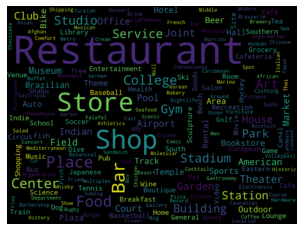

In [24]:
text = ' '.join(Category_list)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000,height=1500).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear', aspect="equal")
plt.axis("off")
plt.show()

#### A word cloud above represents how often a particular word occurs in category list. 
It is visible that words such as Restaurant, Shop, Store or Bar occur very frequently.

Therefore, I decided to merge simillar categories.

In [25]:
capital_compensed_venues = capital_venues.copy()

### restaurants

In [26]:
restaurants = [x for x in Category_list if 'restaurant' in x.lower()] + ['Diner', 'Steakhouse', 'Dizi Place']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Restaurant' 
                                                                                              if x 
                                                                                              in restaurants 
                                                                                              else x)

### gyms

In [27]:
gyms = [x for x in Category_list if 'gym' in x.lower()]
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Gym' 
                                                                                              if x 
                                                                                              in gyms 
                                                                                              else x)

### bars

In [28]:
food = [x for x in Category_list if 'food' in x.lower()] + ['Pizza Place', 'Burger Joint', 'Noodle House',
                                                            'Sandwich Place', 'BBQ Joint', 'Breakfast Spot',
                                                            'Fried Chicken Joint', 'Taco Place', 'Bakery',
                                                            'Burrito Place', 'Soup Place', 'Snack Place',
                                                            'Deli / Bodega', 'Hot Dog Joint', 'Salad Place', 
                                                            'Creperie', 'Wings Joint', 'Wagashi Place', 
                                                            'Poke Place', 'Kafenio', 'Shawarma Place', 
                                                            'Organic Grocery', 'Acai House', 
                                                            'Ash and Haleem Place']
bars = [x for x in Category_list if 'bar' in x.lower()] + ['Bistro', 'Buffet', 'Churrascaria']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Food' 
                                                                                              if x 
                                                                                              in food or x in bars
                                                                                              else x)

### coffe

In [29]:
coffees = [x for x in Category_list if 'cafe' in x.lower()] + ['Café'] + ['Coffee Shop']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Café' 
                                                                                              if x 
                                                                                              in coffees 
                                                                                              else x)

### store

In [30]:
stores = [x for x in Category_list if 'store' in x.lower()] +\
[x for x in Category_list if 'Shop' in x] +\
[x for x in Category_list if 'market' in x.lower()] + ['Boutique']

capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Store' 
                                                                                              if x 
                                                                                              in stores
                                                                                              else x)

### culture

In [31]:
culture = list(set([x for x in Category_list if 'Art' in x] + ['Historic Site', 'Sculpture Garden','Event Space'] +
                   [x for x in Category_list if 'Museum' in x] + ['Library', 'Cultural Center', 'Multiplex'] +
                   [x for x in Category_list if 'Theater' in x] + ['Concert Hall', 'Exhibit', 
                                                                   'Opera House', 'Amphitheater']))
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Culture' 
                                                                                              if x 
                                                                                              in culture
                                                                                              else x)

### club / nightlife

In [32]:
clubs = [x for x in Category_list if 'club' in x.lower()] + ['Music Venue', 'Casino', 'Speakeasy', 
                                                             'Other Nightlife', 'Winery', 
                                                             'Nightlife Spot', 'Marijuana Dispensary']
beers = ['Gastropub', 'Pub', 'Irish Pub', 'Brewery', 'Meyhane'] + [x for x in Category_list if 'beer' in x.lower()]
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Nightlife' 
                                                                                              if x 
                                                                                              in clubs 
                                                                                              or x in beers
                                                                                              else x)

### hostels

In [33]:
hostels = [x for x in Category_list if 'hostel' in x.lower()] + ['Bed & Breakfast', 'Boarding House', 'Motel']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Hostel' 
                                                                                              if x 
                                                                                              in hostels
                                                                                              else x)

### Hotels

In [34]:
hotels = ['Hotel', 'Resort', 'Vacation Rental']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Hotel' 
                                                                                              if x 
                                                                                              in hotels
                                                                                              else x)

### relax

In [35]:
relax = ['Beach', 'Spa', 'Yoga Studio', 'Dance Studio', 'Massage Studio', 'Health & Beauty Service', 
         'Rest Area', 'Nail Salon', 'Sauna / Steam Room']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Relax' 
                                                                                              if x 
                                                                                              in relax
                                                                                              else x)

### temple

In [36]:
temple = [x for x in Category_list if 'temple' in x.lower()] + ['Church', 'Spiritual Center', 'Shrine', 
                                                                'Mosque', 'Monastery']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Temple' 
                                                                                              if x 
                                                                                              in temple
                                                                                              else x)

### public transport

In [37]:
public_transport = ['Gas Station', 'Metro Station', 'Train Station', 'Bus Station', 
                    'Tram Station', 'Rental Car Location', 'Bus Stop', 'Train']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Transport' 
                                                                                              if x 
                                                                                              in public_transport
                                                                                              else x)

### sport

In [38]:
sports = ['Soccer Stadium', 'Basketball Stadium', 'Football Stadium', 'Stadium', 
          'Tennis Stadium', 'Track Stadium', 'Baseball Stadium', 'Bike Rental / Bike Share',
          'Hockey Arena', 'Hockey Field', 'Baseball Field', 'Rugby Pitch', 
          'Athletics & Sports', 'Soccer Field', 'Golf Course', 'Volleyball Court', 'Go Kart Track',
          'Bowling Alley', 'Skating Rink', 'Mini Golf', 'Track', 'Ski Area', 'Surf Spot',
          'Tennis Court', 'Cricket Ground', 'Racetrack', 'Basketball Court']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Sport' 
                                                                                              if x 
                                                                                              in sports
                                                                                              else x)

### outdoor

In [39]:
outdoor = ['Scenic Lookout', 'Monument / Landmark', 'Mountain', 'Castle', 'Palace', 'Hill', 'Forest', 
           'Other Great Outdoors', 'National Park', 'Campground', 'Trail', 'Outdoor Sculpture', 'Bike Trail',
           'Waterfall', 'River', 'Nature Preserve', 'Farm', 'Fishing Spot', 'Boat or Ferry','Harbor / Marina',
           'Bay', 'Waterfront', 'Lake', 'Port', 'Pier', 'Cruise', 'Botanical Garden', 'Zoo', 'Aquarium', 
           'Water Park']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Outdoor' 
                                                                                              if x 
                                                                                              in outdoor
                                                                                              else x)

### other attractions

In [40]:
attractions = ['Dog Run','Playground', 'Fountain', 'Lighthouse', 'Roof Deck', 'Pet Café', 'Theme Park', 
               'Planetarium', 'Skate Park', 'Memorial Site',
               'Water Park', 'Dive Spot', 'Pool Hall', 'Theme Park Ride / Attraction', 'Circus']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Attraction' 
                                                                                              if x 
                                                                                              in attractions
                                                                                              else x)

### airport

In [41]:
airport = [x for x in Category_list if 'Airport' in x] + ['Heliport']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Airport' 
                                                                                              if x 
                                                                                              in airport
                                                                                              else x)

### college

In [42]:
college = [x for x in Category_list if 'college' in x.lower()] + ['Student Center', 'University', 'Auditorium']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'College' 
                                                                                              if x 
                                                                                              in college
                                                                                              else x)

### administration

In [43]:
administration = ['Government Building', 'City Hall', 'Capitol Building', 'Courthouse']
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Admin' 
                                                                                              if x 
                                                                                              in administration
                                                                                              else x)

### other

In [44]:
main_cat = capital_compensed_venues['Venue Category'].value_counts()[:27].index.tolist()
capital_compensed_venues['Venue Category'] = capital_compensed_venues['Venue Category'].apply(lambda x: 'Other' 
                                                                                              if x not
                                                                                              in main_cat
                                                                                              else x)

In [45]:
print('After merge there are only {} uniques categories.'.format(len(
    capital_compensed_venues['Venue Category'].unique())))

After merge there are only 28 uniques categories.


In [46]:
capital_compensed_venues.head()

,Capital Name,Capital Latitude,Capital Longitude,Population,GDP per capita [int$],Life expectancy,Venue Name,Venue Category
0,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Kabul Serena Hotel,Hotel
1,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Ciano ISAF,Food
2,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Park Star Hotel,Hotel
3,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,Barg Continental,Restaurant
4,Kabul,34.51666667,69.183333,3140853.0,2293.0,64.5,İstanbul Restaurant,Restaurant


## One hot Venue Category transform 

In [47]:
capital_compensed_onehot = pd.get_dummies(capital_compensed_venues[['Venue Category']], prefix="", prefix_sep="")
capital_compensed_onehot['Capital Name'] = capital_compensed_venues['Capital Name']
fixed_columns = [capital_compensed_onehot.columns[-1]] + list(capital_compensed_onehot.columns[:-1])
capital_compensed_onehot = capital_compensed_onehot[fixed_columns]

In [48]:
capital_compensed_onehot.head()

,Capital Name,Airport,Attraction,Café,College,Culture,Food,Garden,Gym,Hostel,...,Plaza,Pool,Relax,Restaurant,Road,Sport,Store,Tea Room,Temple,Transport
0,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kabul,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
capital_compensed_grouped = capital_compensed_onehot.groupby('Capital Name').mean().reset_index()
number_of_venues = capital_compensed_venues.groupby('Capital Name').count()['Venue Name'].reset_index(drop=True)

capital_compensed_grouped['number of venues'] = number_of_venues
capital_compensed_grouped.head()

,Capital Name,Airport,Attraction,Café,College,Culture,Food,Garden,Gym,Hostel,...,Pool,Relax,Restaurant,Road,Sport,Store,Tea Room,Temple,Transport,number of venues
0,Abu Dhabi,0.0,0.000000,0.270000,0.0,0.010000,0.130000,0.0,0.010000,0.00,...,0.00,0.05,0.290000,0.0,0.010000,0.110000,0.010000,0.0,0.000000,100
1,Abuja,0.0,0.000000,0.025641,0.0,0.000000,0.179487,0.0,0.051282,0.00,...,0.00,0.00,0.333333,0.0,0.076923,0.051282,0.000000,0.0,0.000000,39
2,Accra,0.0,0.010000,0.020000,0.0,0.050000,0.170000,0.0,0.000000,0.03,...,0.01,0.01,0.350000,0.0,0.010000,0.130000,0.000000,0.0,0.000000,100
3,Addis Ababa,0.0,0.000000,0.142857,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.00,0.00,0.428571,0.0,0.142857,0.285714,0.000000,0.0,0.000000,7
4,Algiers,0.0,0.012658,0.139241,0.0,0.063291,0.126582,0.0,0.000000,0.00,...,0.00,0.00,0.392405,0.0,0.012658,0.012658,0.012658,0.0,0.012658,79


In [50]:
to_analyse.set_index('Capital Name', inplace=True)
capital_compensed_grouped.set_index('Capital Name', inplace=True)
to_cluster = pd.concat([to_analyse, capital_compensed_grouped], axis=1, sort=True)

In [51]:
to_cluster.drop(columns=['Capital Latitude', 'Capital Longitude', 'Continent Name', 'response'], inplace=True)
to_cluster['Life expectancy'] = to_cluster['Life expectancy'].apply(float)

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
def normalize_column(to_cluster, column):
    to_cluster[column] = min_max_scaler.fit_transform(to_cluster[[column]].values)
    return to_cluster[column]

In [53]:
to_cluster['Population'] = normalize_column(to_cluster, 'Population')
to_cluster['Life expectancy'] = normalize_column(to_cluster, 'Life expectancy')
to_cluster['Int$'] = normalize_column(to_cluster, 'Int$')
to_cluster['number of venues'] = normalize_column(to_cluster, 'number of venues')

In [54]:
to_cluster.dropna(inplace=True)
to_cluster.head()

,Population,Life expectancy,Int$,Airport,Attraction,Café,College,Culture,Food,Garden,...,Pool,Relax,Restaurant,Road,Sport,Store,Tea Room,Temple,Transport,number of venues
Abu Dhabi,0.026870,0.788644,0.572833,0.0,0.000000,0.270000,0.0,0.010000,0.130000,0.0,...,0.00,0.05,0.290000,0.0,0.010000,0.110000,0.010000,0.0,0.000000,1.000000
Abuja,0.035853,0.047319,0.036273,0.0,0.000000,0.025641,0.0,0.000000,0.179487,0.0,...,0.00,0.00,0.333333,0.0,0.076923,0.051282,0.000000,0.0,0.000000,0.383838
Accra,0.075877,0.347003,0.038675,0.0,0.010000,0.020000,0.0,0.050000,0.170000,0.0,...,0.01,0.01,0.350000,0.0,0.010000,0.130000,0.000000,0.0,0.000000,1.000000
Addis Ababa,0.140897,0.422713,0.011030,0.0,0.000000,0.142857,0.0,0.000000,0.000000,0.0,...,0.00,0.00,0.428571,0.0,0.142857,0.285714,0.000000,0.0,0.000000,0.060606
Algiers,0.158313,0.753943,0.090068,0.0,0.012658,0.139241,0.0,0.063291,0.126582,0.0,...,0.00,0.00,0.392405,0.0,0.012658,0.012658,0.012658,0.0,0.012658,0.787879


In [55]:
# set number of clusters
kclusters = 12

capital_grouped_clustering = to_cluster

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, 
                algorithm='elkan', max_iter=1000).fit(capital_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 6,  2, 11,  3,  1,  1,  6,  5,  2,  9], dtype=int32)

In [56]:
to_cluster.reset_index(inplace=True)
to_cluster.rename(columns={'index': 'Capital Name'}, inplace=True)
to_cluster['Cluster Labels'] = kmeans.labels_

In [57]:
clustered = to_cluster[['Capital Name', 'Cluster Labels']]
capital_locations = capitals[['Capital Name', 'Capital Latitude', 
                              'Capital Longitude', 'Continent Name']].reset_index()

In [58]:
joined = clustered.join(capital_locations.set_index('Capital Name'), 
                        on='Capital Name').reset_index(drop=True).dropna()

In [59]:
joined['Capital Latitude'] = joined['Capital Latitude'].apply(float)
joined['Capital Longitude'] = joined['Capital Longitude'].apply(float)

In [60]:
joined

,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
0,Abu Dhabi,6,United Arab Emirates,24.466667,54.366667,Asia
1,Abuja,2,Nigeria,9.083333,7.533333,Africa
2,Accra,11,Ghana,5.550000,-0.216667,Africa
3,Addis Ababa,3,Ethiopia,9.033333,38.700000,Africa
4,Algiers,1,Algeria,36.750000,3.050000,Africa
...,...,...,...,...,...,...
165,Windhoek,2,Namibia,-22.566667,17.083333,Africa
166,Yamoussoukro,0,Cote d’Ivoire,6.816667,-5.266667,Africa
167,Yaounde,2,Cameroon,3.866667,11.516667,Africa
168,Yerevan,1,Armenia,40.166667,44.500000,Europe


In [61]:
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(joined['Capital Latitude'], joined['Capital Longitude'], 
                                  joined['Capital Name'], joined['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [62]:
def cluster_name(i):

    clustered = to_cluster[to_cluster['Cluster Labels'] == i]
    clustered = clustered.set_index('Capital Name')
    clustered.drop(columns=['Cluster Labels'], inplace=True)
    center = kmeans.cluster_centers_[i]
    clustered['distance'] = clustered.apply(lambda row: np.linalg.norm(center-row.values), axis=1)
    city = clustered[clustered['distance'] == clustered['distance'].min()].index[0]
    return capitals[capitals['Capital Name'] == city].index[0]

In [63]:
for cluster in joined['Cluster Labels'].unique():
    print('-------------------------------------------------------------------')
    print('CLUSTER NAME: ' + cluster_name(cluster))
    display(joined[joined['Cluster Labels'] == cluster].sort_values(by='Continent Name'))

-------------------------------------------------------------------
CLUSTER NAME: Netherlands


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
0,Abu Dhabi,6,United Arab Emirates,24.466667,54.366667,Asia
142,Singapore,6,Singapore,1.283333,103.850000,Asia
18,Bandar Seri Begawan,6,Brunei Darussalam,4.883333,114.933333,Asia
61,Jerusalem,6,Israel,31.766667,35.233333,Asia
40,Canberra,6,Australia,-35.266667,149.133333,Australia
109,Ottawa,6,Canada,45.416667,-75.700000,Central America
163,"Washington, D.C.",6,United States,38.883333,-77.000000,Central America
45,Copenhagen,6,Denmark,55.666667,12.583333,Europe
49,Dublin,6,Ireland,53.316667,-6.233333,Europe
57,Helsinki,6,Finland,60.166667,24.933333,Europe


-------------------------------------------------------------------
CLUSTER NAME: Mozambique


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
1,Abuja,2,Nigeria,9.083333,7.533333,Africa
8,Antananarivo,2,Madagascar,-18.916667,47.516667,Africa
48,Djibouti,2,Djibouti,11.583333,43.150000,Africa
56,Harare,2,Zimbabwe,-17.816667,31.033333,Africa
67,Kigali,2,Rwanda,-1.950000,30.050000,Africa
70,Kinshasa,2,Democratic Republic of the Congo,-4.316667,15.300000,Africa
82,Lusaka,2,Zambia,-15.416667,28.283333,Africa
90,Maputo,2,Mozambique,-25.950000,32.583333,Africa
165,Windhoek,2,Namibia,-22.566667,17.083333,Africa
167,Yaounde,2,Cameroon,3.866667,11.516667,Africa


-------------------------------------------------------------------
CLUSTER NAME: Kenya


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
2,Accra,11,Ghana,5.550000,-0.216667,Africa
64,Kampala,11,Uganda,0.316667,32.550000,Africa
66,Khartoum,11,Sudan,15.600000,32.533333,Africa
81,Luanda,11,Angola,-8.833333,13.216667,Africa
100,Nairobi,11,Kenya,-1.283333,36.816667,Africa
125,Pretoria,11,South Africa,-25.700000,28.216667,Africa
10,Ashgabat,11,Turkmenistan,37.950000,58.383333,Asia
59,Islamabad,11,Pakistan,33.683333,73.050000,Asia
115,Phnom Penh,11,Cambodia,11.550000,104.916667,Asia
160,Vientiane,11,Laos,17.966667,102.600000,Asia


-------------------------------------------------------------------
CLUSTER NAME: Niger


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
3,Addis Ababa,3,Ethiopia,9.033333,38.700000,Africa
20,Bangui,3,Central African Republic,4.366667,18.583333,Africa
44,Conakry,3,Guinea,9.500000,-13.700000,Africa
74,Libreville,3,Gabon,0.383333,9.450000,Africa
79,Lome,3,Togo,6.116667,1.216667,Africa
95,Monrovia,3,Liberia,6.300000,-10.800000,Africa
103,Niamey,3,Niger,13.516667,2.116667,Africa
105,Nouakchott,3,Mauritania,18.066667,-15.966667,Africa
110,Ouagadougou,3,Burkina Faso,12.366667,-1.516667,Africa
122,Porto-Novo,3,Benin,6.483333,2.616667,Africa


-------------------------------------------------------------------
CLUSTER NAME: Guatemala


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
4,Algiers,1,Algeria,36.750000,3.050000,Africa
154,Tripoli,1,Libya,32.883333,13.166667,Africa
155,Tunis,1,Tunisia,36.800000,10.183333,Africa
127,Rabat,1,Morocco,34.016667,-6.816667,Africa
5,Amman,1,Jordan,31.950000,35.933333,Asia
24,Beirut,1,Lebanon,33.866667,35.500000,Asia
29,Bishkek,1,Kyrgyzstan,42.866667,74.600000,Asia
148,Tashkent,1,Uzbekistan,41.316667,69.250000,Asia
89,Manila,1,Philippines,14.600000,120.966667,Asia
156,Ulaanbaatar,1,Mongolia,47.916667,106.916667,Asia


-------------------------------------------------------------------
CLUSTER NAME: Mexico


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
39,Cairo,5,Egypt,30.050000,31.250000,Africa
153,Tokyo,5,Japan,35.683333,139.750000,Asia
19,Bangkok,5,Thailand,13.750000,100.516667,Asia
23,Beijing,5,China,39.916667,116.383333,Asia
141,Seoul,5,South Korea,37.550000,126.983333,Asia
46,Dhaka,5,Bangladesh,23.716667,90.400000,Asia
55,Hanoi,5,Vietnam,21.033333,105.850000,Asia
60,Jakarta,5,Indonesia,-6.166667,106.816667,Asia
151,Tehran,5,Iran,35.700000,51.416667,Asia
130,Riyadh,5,Saudi Arabia,24.650000,46.700000,Asia


-------------------------------------------------------------------
CLUSTER NAME: Timor-Leste


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
75,Lilongwe,9,Malawi,-13.966667,33.783333,Africa
124,Praia,9,Cape Verde,14.916667,-23.516667,Africa
47,Dili,9,Timor-Leste,-8.583333,125.600000,Asia
63,Kabul,9,Afghanistan,34.516667,69.183333,Asia
136,Sanaa,9,Yemen,15.350000,44.200000,Asia
152,Thimphu,9,Bhutan,27.466667,89.633333,Asia
9,Apia,9,Samoa,-13.816667,-171.766667,Australia
58,Honiara,9,Solomon Islands,-9.433333,159.950000,Australia
85,Majuro,9,Marshall Islands,7.100000,171.383333,Australia
106,Nuku’alofa,9,Tonga,-21.133333,-175.200000,Australia


-------------------------------------------------------------------
CLUSTER NAME: South Sudan


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
11,Asmara,10,Eritrea,15.333333,38.933333,Africa
30,Bissau,10,Guinea-Bissau,11.850000,-15.583333,Africa
62,Juba,10,South Sudan,4.850000,31.616667,Africa
97,Moroni,10,Comoros,-11.700000,43.233333,Africa
107,N’Djamena,10,Chad,12.100000,15.033333,Africa
139,Sao Tome,10,Sao Tome and Principe,0.333333,6.733333,Africa


-------------------------------------------------------------------
CLUSTER NAME: Hungary


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
99,Muscat,4,Oman,23.616667,58.583333,Asia
71,Kuala Lumpur,4,Malaysia,3.166667,101.700000,Asia
72,Kuwait City,4,Kuwait,29.366667,47.966667,Asia
88,Manama,4,Bahrain,26.233333,50.566667,Asia
164,Wellington,4,New Zealand,-41.300000,174.783333,Australia
134,San Jose,4,Costa Rica,9.933333,-84.083333,Central America
112,Panama City,4,Panama,8.966667,-79.533333,Central America
162,Warsaw,4,Poland,52.250000,21.000000,Europe
161,Vilnius,4,Lithuania,54.683333,25.316667,Europe
147,Tallinn,4,Estonia,59.433333,24.716667,Europe


-------------------------------------------------------------------
CLUSTER NAME: Saint Lucia


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
52,Gaborone,8,Botswana,-24.633333,25.900000,Africa
117,Port Louis,8,Mauritius,-20.150000,57.483333,Africa
158,Victoria,8,Seychelles,-4.616667,55.450000,Africa
15,Baghdad,8,Iraq,33.333333,44.400000,Asia
50,Dushanbe,8,Tajikistan,38.550000,68.766667,Asia
69,Kingstown,8,Saint Vincent and the Grenadines,13.133333,-61.216667,Central America
22,Basseterre,8,Saint Kitts and Nevis,17.300000,-62.716667,North America
42,Castries,8,Saint Lucia,14.000000,-61.000000,North America
132,Saint George’s,8,Grenada,12.050000,-61.750000,North America
38,Buenos Aires,8,Argentina,-34.583333,-58.666667,South America


-------------------------------------------------------------------
CLUSTER NAME: Equatorial Guinea


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
17,Bamako,0,Mali,12.650000,-8.000000,Africa
21,Banjul,0,The Gambia,13.450000,-16.566667,Africa
51,Freetown,0,Sierra Leone,8.483333,-13.233333,Africa
86,Malabo,0,Equatorial Guinea,3.750000,8.783333,Africa
91,Maseru,0,Lesotho,-29.316667,27.483333,Africa
92,Mbabane,0,Swaziland,-26.316667,31.133333,Africa
166,Yamoussoukro,0,Cote d’Ivoire,6.816667,-5.266667,Africa


-------------------------------------------------------------------
CLUSTER NAME: Federated States of Micronesia


,Capital Name,Cluster Labels,Country Name,Capital Latitude,Capital Longitude,Continent Name
111,Palikir,7,Federated States of Micronesia,6.916667,158.15,Australia


In [64]:
distances = pd.DataFrame(euclidean_distances(kmeans.cluster_centers_, kmeans.cluster_centers_))
distances

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.082796,0.573318,0.380198,1.192386,1.220092,1.327807,1.029294,0.694429,0.480965,0.510268,0.983228
1,1.082796,0.000000,0.566335,0.955782,0.223351,0.423051,0.479290,1.360622,0.517899,0.862840,1.181453,0.293046
2,0.573318,0.566335,0.000000,0.446092,0.717077,0.745607,0.902660,1.051851,0.335550,0.477447,0.761333,0.450071
3,0.380198,0.955782,0.446092,0.000000,1.085386,1.106752,1.217479,0.996845,0.529893,0.368727,0.594648,0.875663
4,1.192386,0.223351,0.717077,1.085386,0.000000,0.442709,0.282816,1.420326,0.596691,0.948944,1.275404,0.471392
5,1.220092,0.423051,0.745607,1.106752,0.442709,0.000000,0.550760,1.457554,0.692224,1.007967,1.302554,0.547016
6,1.327807,0.479290,0.902660,1.217479,0.282816,0.550760,0.000000,1.517948,0.724861,1.075721,1.401352,0.707633
7,1.029294,1.360622,1.051851,0.996845,1.420326,1.457554,1.517948,0.000000,1.025349,0.917272,1.162440,1.349706
8,0.694429,0.517899,0.335550,0.529893,0.596691,0.692224,0.724861,1.025349,0.000000,0.395548,0.818754,0.577344
9,0.480965,0.862840,0.477447,0.368727,0.948944,1.007967,1.075721,0.917272,0.395548,0.000000,0.546060,0.864533


In [65]:
def nearest_claster(i):
    return distances[i].sort_values().index.tolist()[1]

In [66]:
def second_nearest_claster(i):
    return distances[i].sort_values().index.tolist()[2]

In [67]:
cluster = pd.Series(range(kclusters))
# cluster = cluster.apply(lambda x: x+1)
closest_clusters = pd.DataFrame(cluster)
closest_clusters.rename(columns={0:'cluster_name'}, inplace=True)
closest_clusters['nearest_claster'] = closest_clusters['cluster_name'].apply(nearest_claster)
closest_clusters['second_nearest_claster'] = closest_clusters['cluster_name'].apply(second_nearest_claster)
closest_clusters['cluster_name'] = closest_clusters['cluster_name'].apply(cluster_name)
closest_clusters['nearest_claster'] = closest_clusters['nearest_claster'].apply(cluster_name)
closest_clusters['second_nearest_claster'] = closest_clusters['second_nearest_claster'].apply(cluster_name)
closest_clusters

,cluster_name,nearest_claster,second_nearest_claster
0,Equatorial Guinea,Niger,Timor-Leste
1,Guatemala,Hungary,Kenya
2,Mozambique,Saint Lucia,Niger
3,Niger,Timor-Leste,Equatorial Guinea
4,Hungary,Guatemala,Netherlands
5,Mexico,Guatemala,Hungary
6,Netherlands,Hungary,Guatemala
7,Federated States of Micronesia,Timor-Leste,Niger
8,Saint Lucia,Mozambique,Timor-Leste
9,Timor-Leste,Niger,Saint Lucia
